In [572]:
import numpy as np
import pandas as pd
import scipy.stats as si
import yfinance as yf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [573]:
FTM = yf.download("FTM-USD", start="2021-03-31", end="2022-03-31")

[*********************100%***********************]  1 of 1 completed


In [574]:
FTM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,0.432525,0.446946,0.391088,0.423144,0.423144,132826277
2021-04-01,0.422651,0.457409,0.410224,0.444327,0.444327,114036463
2021-04-02,0.443257,0.467790,0.421637,0.428744,0.428744,91681121
2021-04-03,0.428415,0.445967,0.388718,0.389422,0.389422,75475256
2021-04-04,0.389265,0.425720,0.383778,0.409999,0.409999,65648648


In [575]:
FTM.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,1.398628,1.432255,1.357642,1.430095,1.430095,386201967
2022-03-28,1.430397,1.483789,1.401355,1.403734,1.403734,622191451
2022-03-29,1.402998,1.474299,1.391417,1.418792,1.418792,541588613
2022-03-30,1.417993,1.452790,1.379176,1.409386,1.409386,449596078
2022-03-31,1.409122,1.527636,1.406284,1.423092,1.423092,1062056054


In [576]:
FTM_price = FTM['Adj Close'][-1]
print('The spot price of Fantom Cryptocurrency is $', round(FTM_price,2))

The spot price of Fantom Cryptocurrency is $ 1.42


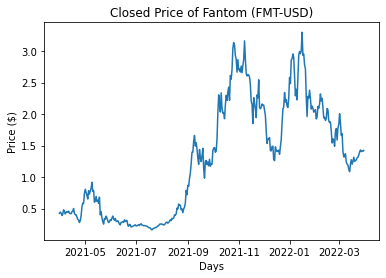

In [577]:
fig = plt.figure()
plt.plot(FTM['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price of Fantom (FMT-USD)');

In [578]:
FTM_log_return = np.log(FTM['Adj Close'] / FTM['Adj Close'].shift(1))
FTM_vol = np.sqrt(365) * FTM_log_return.std()
print('The annulized log return of Fantom Cryptocurrency is')
FTM_log_return

The annulized log return of Fantom Cryptocurrency is


Date
2021-03-31         NaN
2021-04-01    0.048848
2021-04-02   -0.035701
2021-04-03   -0.096196
2021-04-04    0.051491
                ...   
2022-03-27    0.021891
2022-03-28   -0.018605
2022-03-29    0.010670
2022-03-30   -0.006652
2022-03-31    0.009678
Name: Adj Close, Length: 366, dtype: float64

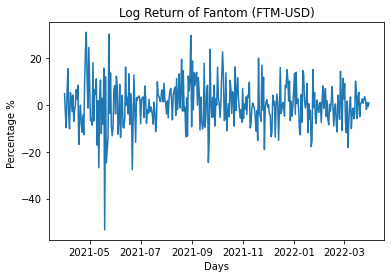

In [579]:
fig = plt.figure()
plt.plot(FTM_log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return of Fantom (FTM-USD)');

In [580]:
print('The annualised volatility of Fantom Cryptocurrency is', round(FTM_vol*100,2), '%')

The annualised volatility of Fantom Cryptocurrency is 182.56 %


In [581]:
#Beginning of Black Scholes Model

In [582]:
def FTM_euro_option_bsm(S, K, T, r, FTM_vol, FTM_payoff):
    
    #S: spot price of Fantom Cryptocurrency
    #K: strike price
    #T: time to maturity
    #r: risk free rate (USA)
    #FTM_vol: volatility of Fantom Cryptocurrency
    #payoff: call
    
    FTM_d1 = (np.log(S / K) + (r + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    FTM_d2 = (np.log(S / K) + (r - 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    if FTM_payoff == "call":
        FTM_option_value = S * si.norm.cdf(FTM_d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(FTM_d2, 0.0, 1.0)
    elif FTM_payoff == "put":
        FTM_option_value = - S * si.norm.cdf(-FTM_d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-FTM_d2, 0.0, 1.0)
    
    return FTM_option_value

In [589]:
#payoff: call
S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
FTM_vol

FTM_bsm_call = FTM_euro_option_bsm(S, K, T, r, FTM_vol, 'call')
print("The fair value of Black Scholes Model European call option for Fantom Cryptocurrency is: ${:.8}".format(FTM_bsm_call))

The fair value of Black Scholes Model European call option for Fantom Cryptocurrency is: $0.93208915


In [590]:
#Beginning of Monte Carlo Simulation

In [591]:
def FTM_mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - ADA_vol ** 2 / 2) * dt + ADA_vol * np.sqrt(dt) * rn[t]) 
    return S

In [592]:
S0 = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
FTM_vol
payoff = "call"

In [593]:
S = mcs_simulation_np(10000)
S = np.transpose(S)
S

array([[1.42309201, 1.44451596, 1.41425925, ..., 0.93287341, 0.94928424,
        0.97306058],
       [1.42309201, 1.4284378 , 1.38398948, ..., 0.67791218, 0.66861637,
        0.64868564],
       [1.42309201, 1.43097824, 1.46686525, ..., 2.80114501, 2.7525186 ,
        2.73076077],
       ...,
       [1.42309201, 1.41343539, 1.433332  , ..., 0.04344126, 0.04308637,
        0.04374421],
       [1.42309201, 1.42824933, 1.4335543 , ..., 0.10249029, 0.10132023,
        0.10402373],
       [1.42309201, 1.42371391, 1.40903231, ..., 0.05299481, 0.05306021,
        0.05283015]])

In [594]:
FTM_mcs_call = np.mean(np.maximum(S[:,-1] - K,0))
print("The fair value of Monte Carlo Simulation European call option for Fantom Cryptocurrency is: ${:.8}".format(FTM_mcs_call))

The fair value of Monte Carlo Simulation European call option for Fantom Cryptocurrency is: $0.95622853


In [595]:
#Beginning of Greeks

In [596]:
#Delta

In [597]:
def delta(S, K, T, r, q, FTM_vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [599]:

S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
q = 0.0
FTM_vol
d= delta(S, K, T, r, q, FTM_vol, 'call')
print('The value of Delta is', d.round(4),'.','If the Cryptocurrency price increases by $1, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.8322 . If the Cryptocurrency price increases by $1, then the value of the option will increase $ 0.8322 .


In [600]:
S = np.linspace(0.5,3,5)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], K, T, r, q, FTM_vol, 'call')

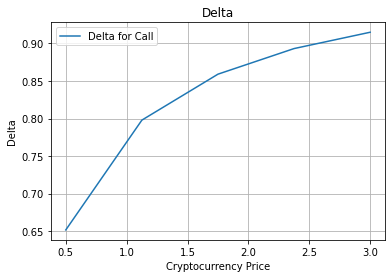

In [601]:
#2D Figure
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Cryptocurrency Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [602]:

#Surface of Delta

S = np.linspace(0.5,3,5)
T = np.linspace(0.1, 0.5, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, q, FTM_vol, 'call')

/var/folders/n6/401l90_d2xj1_4w727k3nvzc0000gp/T/ipykernel_16214/1800747506.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


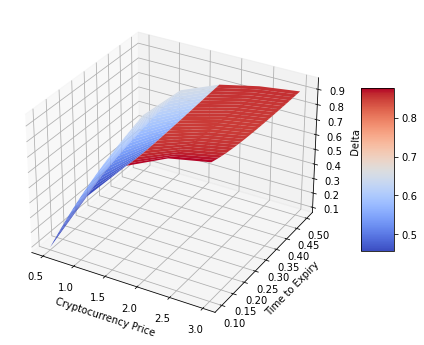

In [603]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [604]:
#Gamma

In [605]:
def gamma(S, K, T, r, q, FTM_vol, FTM_payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (FTM_vol * S * np.sqrt(T))
    
    return gamma

In [609]:
S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
q = 0.0
FTM_vol
g = gamma(S, K, T, r, q, FTM_vol, 'call')
print('The value of Gamma is', g.round(4),'.','If the Cryptocurrency price increases by $1, then the value of Delta will increase $', g.round(4), '.')

The value of Gamma is 0.0966 . If the Cryptocurrency price increases by $1, then the value of Delta will increase $ 0.0966 .


In [610]:
S = np.linspace(0.5,3,5)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], K, T, r, q, FTM_vol, 'call')

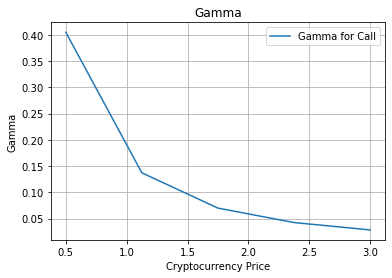

In [611]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Cryptocurrency Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [612]:
#Surface of Gamma
S = np.linspace(0.5,3,5)
T = np.linspace(0.1, 0.5, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, q, FTM_vol, 'call')

/var/folders/n6/401l90_d2xj1_4w727k3nvzc0000gp/T/ipykernel_16214/3930773881.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


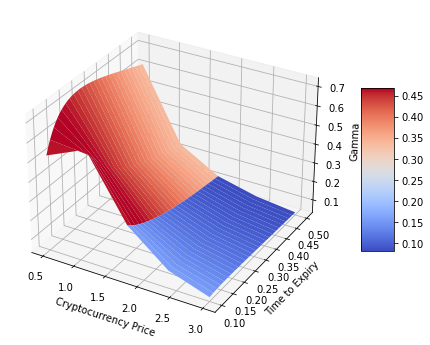

In [613]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [614]:
#Theta

In [615]:
def theta(S, K, T, r, q, FTM_vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    if payoff == "call":
        theta = FTM_vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = FTM_vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [619]:
S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
q = 0.0
FTM_vol
t = theta(S, K, T, r, q, FTM_vol, 'call')
print('The value of Theta is', t.round(4),'.') 

The value of Theta is 0.3301 .


In [620]:
T = np.linspace(0.5,3,5)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(S, K, T[i], r, q, FTM_vol, 'call')

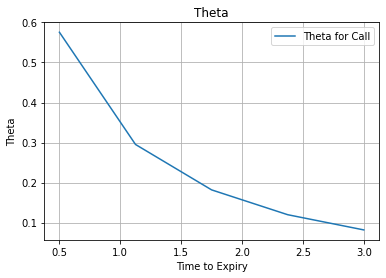

In [621]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [622]:
#Surface of Theta
S = np.linspace(0.5,3,5)
T = np.linspace(0.1, 0.5, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], K, T[i], r, q, FTM_vol, 'call')

/var/folders/n6/401l90_d2xj1_4w727k3nvzc0000gp/T/ipykernel_16214/1595790275.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


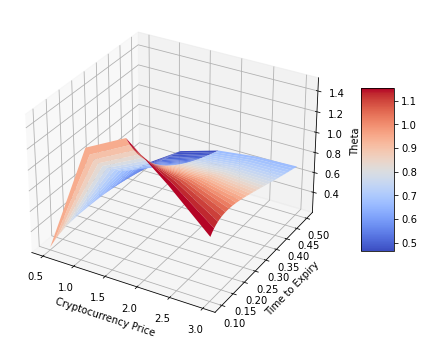

In [623]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [624]:
#Rho

In [625]:
def rho(S, K, T, r, q, FTM_vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [627]:
S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
q = 0.0
FTM_vol
r= rho(S, K, T, r, q, FTM_vol, 'call')
print('The value of Rho is', r.round(4),'.') 

The value of Rho is 0.2522 .


In [628]:
r = np.linspace(0.5,3,5)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(S, K, T, r[i], q, FTM_vol, 'call')

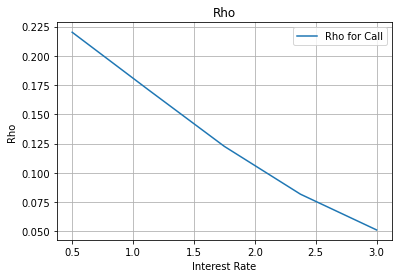

In [629]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [630]:
S = np.linspace(0.5,3,5)
T = np.linspace(0.1, 0.5, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 1.32, T[i], 0.016, 0.0, 1.8256, 'call')

/var/folders/n6/401l90_d2xj1_4w727k3nvzc0000gp/T/ipykernel_16214/4069907193.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


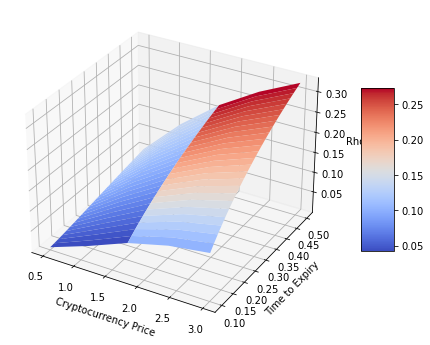

In [631]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [632]:
#Vega

In [633]:
def vega(S, K, T, r, q, FTM_vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * FTM_vol ** 2) * T) / (FTM_vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [637]:
S = FTM['Adj Close'][-1]
K = 1.32
T = 1
r = 0.016
q = 0.0
FTM_vol
v= vega(S, K, T, r, q, FTM_vol, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is [0.5171 0.4615 0.3694 0.2678 0.176 ] . If the volatility increases 1%, then the value of the option will increase $ [0.005171 0.004615 0.003694 0.002678 0.00176 ] .


In [638]:
FTM_vol = np.linspace(0.5,3,5)
Vega = np.zeros((len(FTM_vol),1))
for i in range(len(FTM_vol)):
    Vega [i] = vega(S, K, T, r, q, FTM_vol[i], 'call')

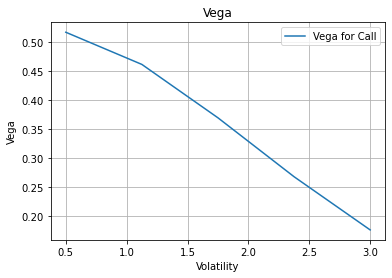

In [639]:
fig = plt.figure()
plt.plot(FTM_vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [640]:
S = np.linspace(0.5,3,5)
T = np.linspace(0.1, 0.5, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 1.32, T[i], 0.016, 0.0, 1.8256, 'call')

/var/folders/n6/401l90_d2xj1_4w727k3nvzc0000gp/T/ipykernel_16214/2732205363.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


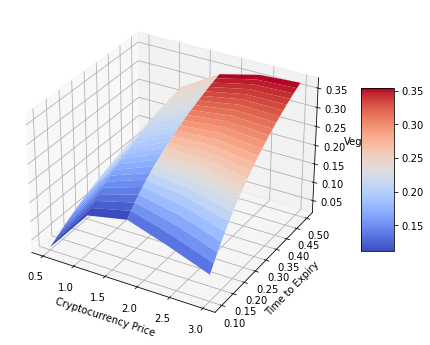

In [641]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);